# Lecture 7 : Machine Learning I - Linear Regression

* Now, you can explore and discover insights of your data using data import, wrangling, visualization and basic analysis.
* Based on insights from the data, you can make models with machine learning algorithms.
* There are three basic machine learning algorithms which are largely used:
    * Regression
    * Classification
    * Clustering
* In this lecture, you will learn basic examples of machine learning algorithms with Python.

* For practing machine learning with Python, the SciKit Learn (https://scikit-learn.org/stable/) module is very useful. 
* You can install the package by `pip install scikit-learn` or `conda install scikit-learn` (https://scikit-learn.org/stable/install.html).

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Linear Regression

* One of the most common statistical methods is linear regression (https://en.wikipedia.org/wiki/Linear_regression).
* When you use it, you are making the assumption that there is a linear relationship between an outcome variable and a predictor.
* https://www.youtube.com/watch?v=Qa2APhWjQPc
* You can also check out further materials to learn.
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    * https://scikit-learn.org/stable/modules/linear_model.html#linear-model

* Let's make a linear regression model with the USA_Housing.csv data.

In [5]:
df_housing = pd.read_csv('./USA_Housing.csv')
df_housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [7]:
import sklearn
from sklearn.linear_model import LinearRegression

* Create a LinearRegression object.

In [9]:
regressor = LinearRegression()

* .fit() fits a linear model

In [13]:
x = df_housing[['Avg. Area Income']]
y = df_housing['Price']

In [15]:
regressor.fit(x,y)

LinearRegression()

In [17]:
regressor.intercept_

-221579.4782059174

In [19]:
regressor.coef_

array([21.19548317])

* Let's visualize the fitted model with using matplotlib.
* .predict() is used to predict y using the linear model with estimated coefficients.

In [23]:
regressor.predict(x)

array([1464424.9504096 , 1458133.78934377, 1077429.52283635, ...,
       1122016.75893299, 1219741.59365632, 1166948.95599714])

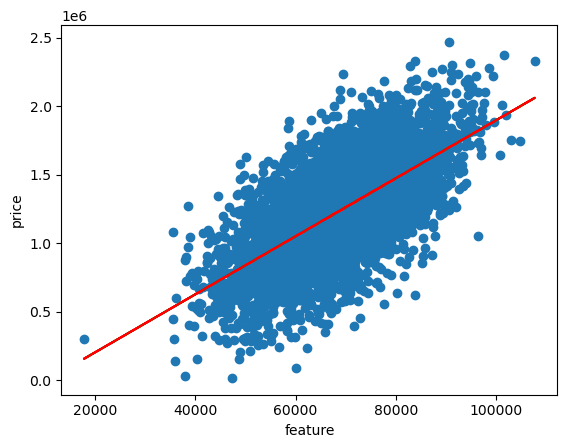

In [29]:
plt.xlabel("feature")
plt.ylabel("price")

plt.scatter(x, y)
plt.plot(x, 21.19548317*x+(-221579.47820592), color="green")
plt.plot(x, regressor.predict(x), color = "red")
plt.show()

* How about taking more variables?

In [33]:
x_multi = df_housing.drop(['Price', 'Address'],axis=1)
y = df_housing['Price']

multi_lreg = LinearRegression()
multi_lreg.fit(x_multi, y)

LinearRegression()

In [35]:
multi_lreg.intercept_

-2637299.033328126

In [37]:
multi_lreg.coef_

array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

* The goal of machine learning in regression is to produce a model that generalises well to new data. The test set serves as a proxy for new data. Trained data is the data on which you apply the linear regression algorithm. And then, you can test that algorithm on the test data.

In [39]:
from sklearn.model_selection import train_test_split

x_multi = df_housing.drop(['Price', 'Address'],axis=1)
y = df_housing[['Price']]

x_train, x_test, y_train, y_test = train_test_split(x_multi, y, random_state=1)

In [41]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3750, 5) (1250, 5) (3750, 1) (1250, 1)


In [43]:
multi_lreg = LinearRegression()
multi_lreg.fit(x_train, y_train)

LinearRegression()

* Let’s perform predictions to the test set and see how well it did.

In [49]:
predictions = multi_lreg.predict(x_test)

* Now compare the actual output values for x_test with the predicted values,

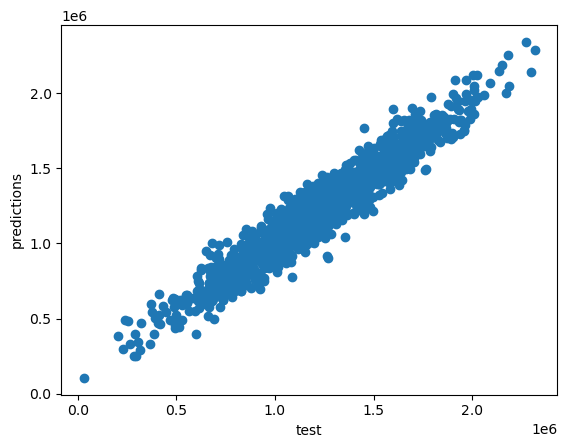

In [51]:
plt.xlabel('test')
plt.ylabel('predictions')

plt.scatter(y_test,predictions)
plt.show()

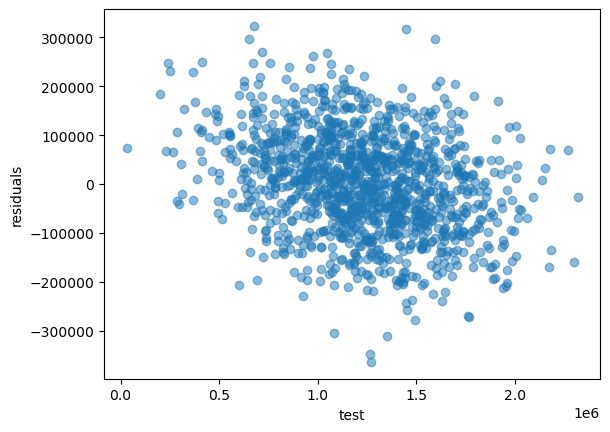

In [53]:
plt.xlabel('test')
plt.ylabel('residuals')

plt.scatter(y_test,predictions-y_test, alpha=0.5)
plt.show()

* The final step is to evaluate the performance of the algorithm.

In [55]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

83008.94807797587

In [59]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

103026.2191600212

* You can also learn more about the metric in https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d.